# ANOVA

**In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. In other words, the ANOVA is used to test the difference between two or more means.**

**The one-way ANOVA compares the means of the groups you are interested in and determines whether any of those means are statistically different from each other.**

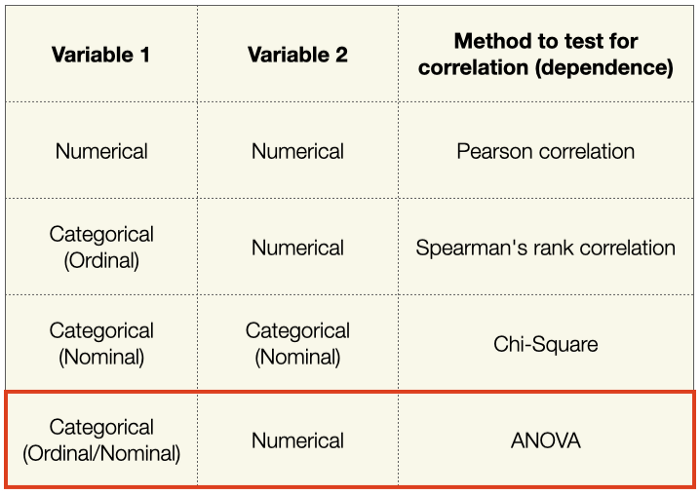

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Sudents grades average

a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]

# Salaries in 10,000s of 3 groups of Data Scientists with different backgrounds
#g1=[5,9,10,12,8,8,9]
#g2=[5,4, 4, 5,5,4,8]
#g3=[9,8, 5, 6,7,7,6]

list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


**Step 1: compute the average mark for each college like so:**

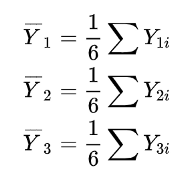

In [4]:
import numpy as np
m1=np.mean(a)
m2=np.mean(b)
m3=np.mean(c)

print('Average mark for college A: {}'.format(m1))
print('Average mark for college B: {}'.format(m2))
print('Average mark for college C: {}'.format(m3))

Average mark for college A: 25.0
Average mark for college B: 26.5
Average mark for college C: 26.0


**Step 2: compute the overall mean (k is the number of groups, hence in our case k=3):**

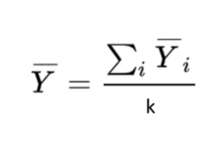

In [5]:
m=(m1+m2+m3)/3 
print('Overall mean: {}'.format(m))

Overall mean: 25.833333333333332


**Step 3: compute the ‘between-group’ sum of squared differences (where n is the number of observations per group/college, hence in our case n=6):**

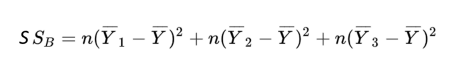

In [6]:
SSb=6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


**With those results, we can already compute one of the components of our F-score, which is the between-group mean square value (MSb). Indeed, knowing that the between-group degrees of freedom are k-1 (that means, one less than the number of groups), we can compute the MSb as:**

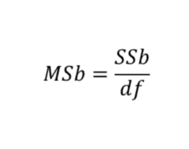

**Where df are the degrees of freedom.**

In [7]:
MSb=SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


**Step 4: calculate the “within-group” sum of squares.**

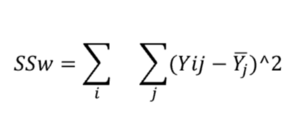

In [8]:
err_a=list(a-m1)
err_b=list(b-m2)
err_c=list(c-m3)
err=err_a+err_b+err_c
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 223.5


**Again, knowing that there are k(n-1) within-group degrees of freedom (hence in our case 15), we can compute the within-group mean square value:**

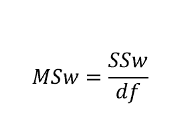

In [9]:
MSw=SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


**Step 5: compute the F-score:**

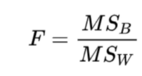

The F-value in an ANOVA is calculated as: variation between sample means / variation within the samples. The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples. The higher the F-value, the lower the corresponding p-value.

If the p-value is below a certain threshold (e.g. α = .05), we can reject the null hypothesis of the ANOVA and conclude that there is a statistically significant difference between group means.

In [10]:
F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 0.23489932885906037


**The F ratio is the ratio of two mean square values. If the null hypothesis is true, you expect F to have a value close to 1.0 most of the time. A large F ratio means that the variation among group means is more than you'd expect to see by chance.**

## One line of code to compute ANOVA

**Let’s double-check this value with scipy:**

In [11]:
import scipy.stats as stats 
stats.f_oneway(a,b,c) 

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

**We do not reject the Null hypothesis about equality among means. We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.**

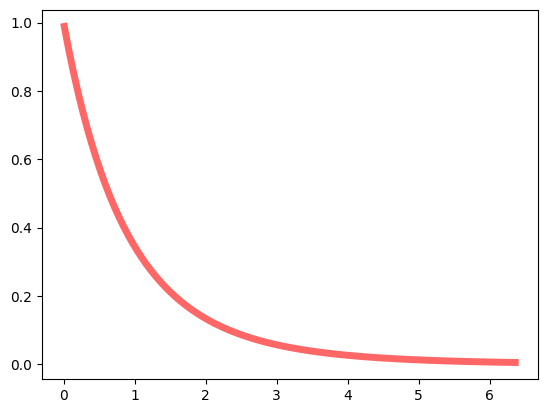

In [12]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

Let’s say we set alpha, which the level of significance, equal to 5%. The corresponding F-critical value is 3.68. Hence:

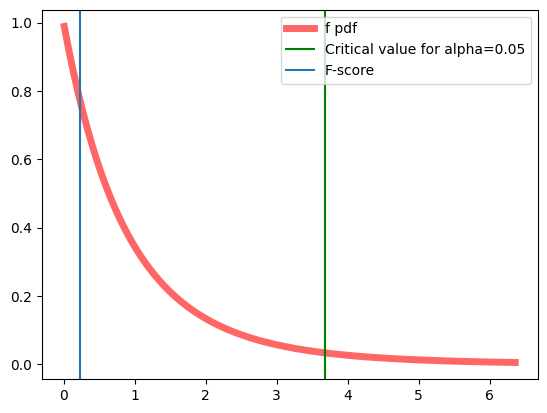

In [13]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()

**We do not reject the Null hypothesis about equality among means. We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.**

In [14]:
###########################################################################################################################

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import f

g1=[5,9,10,12,8,8,9]
g2=[5,4, 4, 5,5,4,8]
g3=[9,8, 5, 6,7,7,6]

df = pd.DataFrame.from_dict({'g1': [5,9,10,12,8,8,9], 
                        'g2': [5,4, 4, 5,5,4,8], 
                        'g3': [9,8, 5, 6,7,7,6]})

df

,g1,g2,g3
0,5,5,9
1,9,4,8
2,10,4,5
3,12,5,6
4,8,5,7
5,8,4,7
6,9,8,6


In [16]:
m = df.shape[1]
n = df.shape[0]
SST = np.sum(np.sum((df - np.mean(np.mean(df)))**2))
SST

98.57142857142858

In [17]:
df_sst = m*n-1
df_sst

20

In [18]:
SSW = np.sum(np.sum((df - np.mean(df))**2))
SSW

98.57142857142858

In [19]:
df_ssw = m*(n-1)
df_ssw

18

In [20]:
SSB = np.sum(np.sum((np.tile(np.mean(df), (3,1)) - np.mean(np.mean(df)))**2))
SSB

0.0

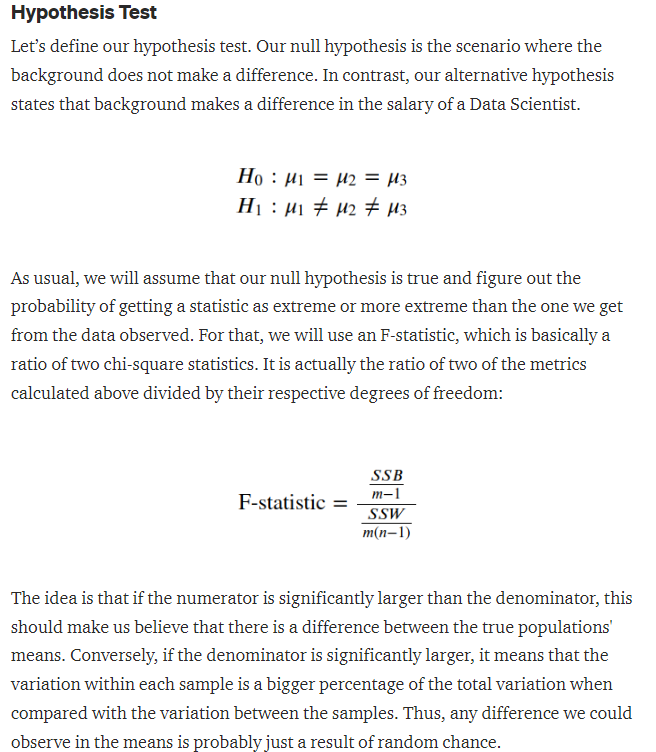

In [21]:
df_ssb = m-1
df_ssb

2

In [22]:
F = (SSB/df_ssb)/(SSW/df_ssw)
F

0.0

In [23]:
f.ppf(0.95, dfn=df_ssb, dfd=df_ssw)

3.554557145661787

In [24]:
p_value = (1 - f.cdf(F, dfn=df_ssb, dfd=df_ssw))*2
p_value

2.0

In [25]:
if p_value<0.05:
    print('Reject H_0')
else:
    print('Accept H_0')

Accept H_0


# Chi-Square

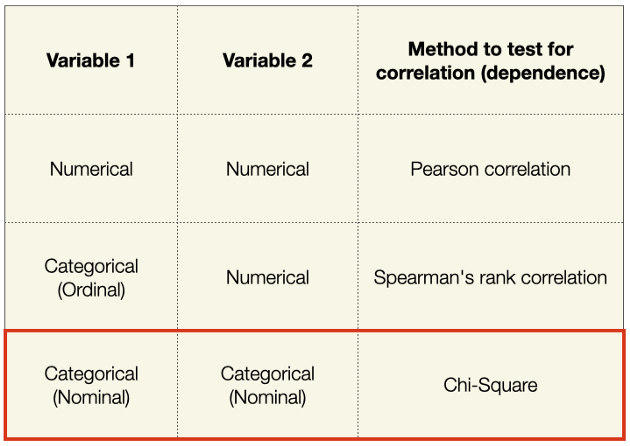

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smpoker', 'Non-Smpoker', 'Smoker'] * 10
                  })
df.head()

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smpoker
3,F,Non-Smpoker
4,F,Smoker


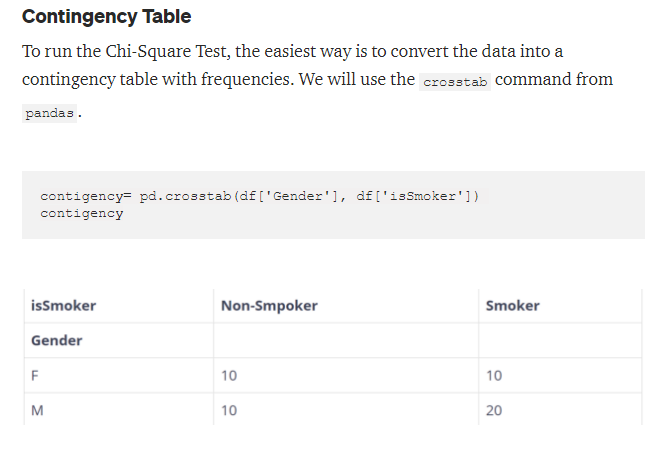

In [27]:
contigency = pd.crosstab(df['Gender'], df['isSmoker'], normalize='index') # all,columns
contigency

isSmoker,Non-Smpoker,Smoker
Gender,,
F,0.500000,0.500000
M,0.333333,0.666667


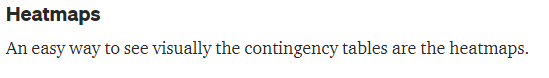

<Axes: xlabel='isSmoker', ylabel='Gender'>

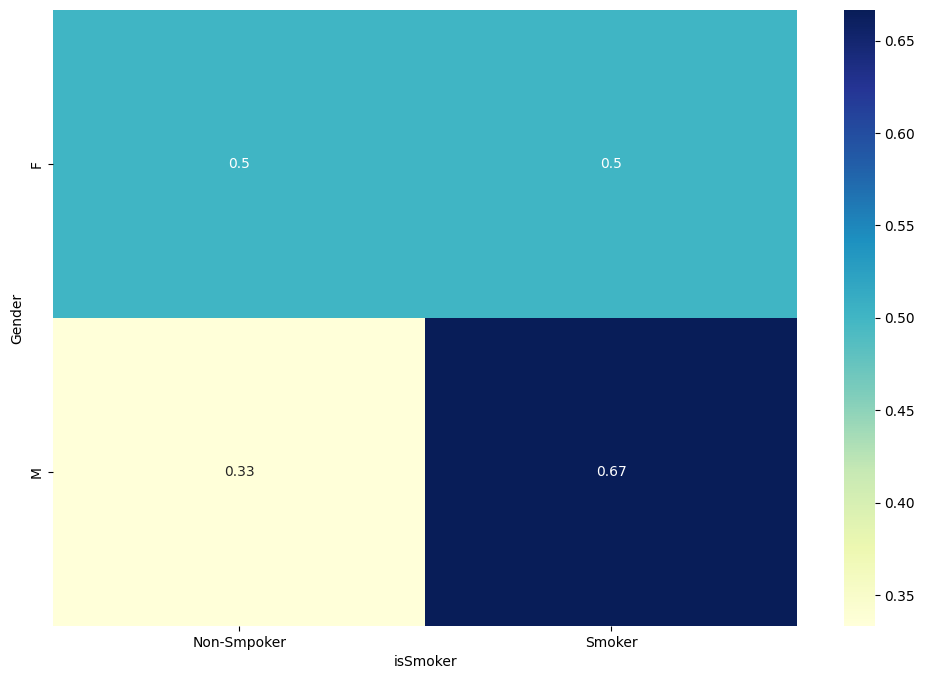

In [28]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

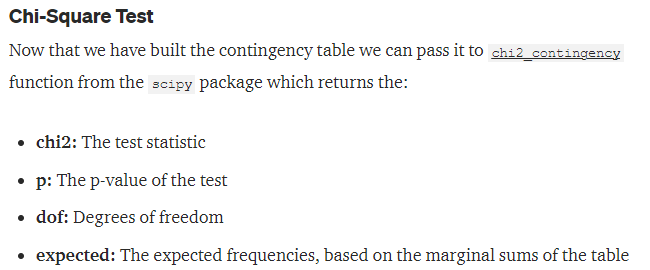

In [29]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 

In [30]:
# Print the p-value
print(p)

1.0


The p-value is 100% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that Smokers and Gender are independent. 

In [31]:
#########################################################################################################################

**Is there any evidence of a relationship between the age group and their political affiliation, at 5% significant level?**

In [35]:
import pandas as pd
import scipy.stats as stats

# create sample data according to survey
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]
df = pd.DataFrame(data, columns = ['Age Group', 'Political Affiliation'])
df.sample(5)

,Age Group,Political Affiliation
533,30-44,Socialist
587,45-65,Conservative
369,30-44,Conservative
995,45-65,Other
467,30-44,Socialist


In [33]:
df.tail()

,Age Group,Political Affiliation
1184,65 & older,Socialist
1185,65 & older,Other
1186,65 & older,Other
1187,65 & older,Other
1188,65 & older,Other


In [34]:
 # create contingency table
data_crosstab = pd.crosstab(df['Age Group'],
                            df['Political Affiliation'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['Age Group'].unique()
columns = df['Political Affiliation'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 24.367421717305202  and p value is: 0.0004469083391495099
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 24.367421717305202  and critical value is: 12.591587243743977
Null Hypothesis is rejected.
